# Consumer Shopping Behavior Analysis -- using Python,Numpy,Pandas,Matplotlib and Seaborn  

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set plotting styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titleweight'] = 'bold'

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\Consumer_Shoping_Analysis\customer_shopping_behavior.csv")
df_original = df.copy()
print('Rows, Columns:', df.shape)
df.head()

Rows, Columns: (3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Basic cleaning & type conversions
# Rename columns to safe names
df.columns = [c.strip().replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_').lower() for c in df.columns]

# Convert booleans
for col in ['discount_applied','promo_code_used','subscribed']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': True, 'no': False, 'true': True, 'false': False}).fillna(False)

# Parse dates if present
for c in df.columns:
    if 'date' in c or c in ['purchase_date','order_date']:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Fix numeric columns
if 'purchase_amount_usd' in df.columns:
    df['purchase_amount_usd'] = pd.to_numeric(df['purchase_amount_usd'], errors='coerce')

# Quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount_usd     3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3863 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   bool   
 14  promo_code_used         3900 non-null   

gender
Male      157890
Female     75191
Name: purchase_amount_usd, dtype: int64

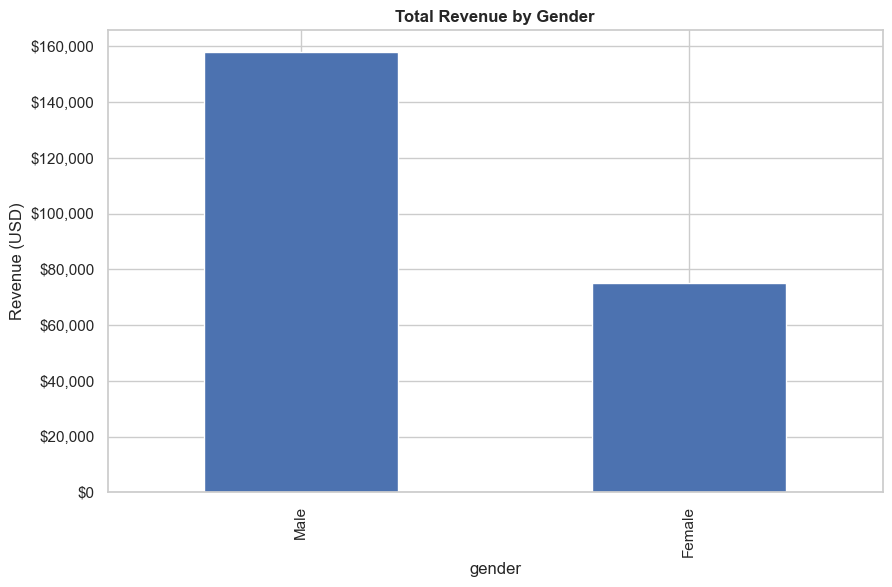

In [5]:
# Q1: Total revenue by gender
if 'gender' in df.columns and 'purchase_amount_usd' in df.columns:
    rev_by_gender = df.groupby('gender')['purchase_amount_usd'].sum().sort_values(ascending=False)
    display(rev_by_gender)
    ax = rev_by_gender.plot(kind='bar', title='Total Revenue by Gender', ylabel='Revenue (USD)')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))
    plt.show()

In [6]:
# Q2: Customers who used a discount but spent more than average
avg_spend = df['purchase_amount_usd'].mean()
high_value_discount = df[(df.get('discount_applied', False)) & (df['purchase_amount_usd'] > avg_spend)]
display(high_value_discount[['customer_id','purchase_amount_usd','discount_applied']].head(10))
print('Count:', high_value_discount['customer_id'].nunique())

,customer_id,purchase_amount_usd,discount_applied
1,2,64,True
2,3,73,True
3,4,90,True
6,7,85,True
8,9,97,True
11,12,68,True
12,13,72,True
15,16,81,True
19,20,90,True
21,22,62,True


Count: 839


item_purchased
Gloves     3.862774
Sandals    3.844654
Boots      3.818881
Hat        3.801307
Skirt      3.785350
Name: review_rating, dtype: float64

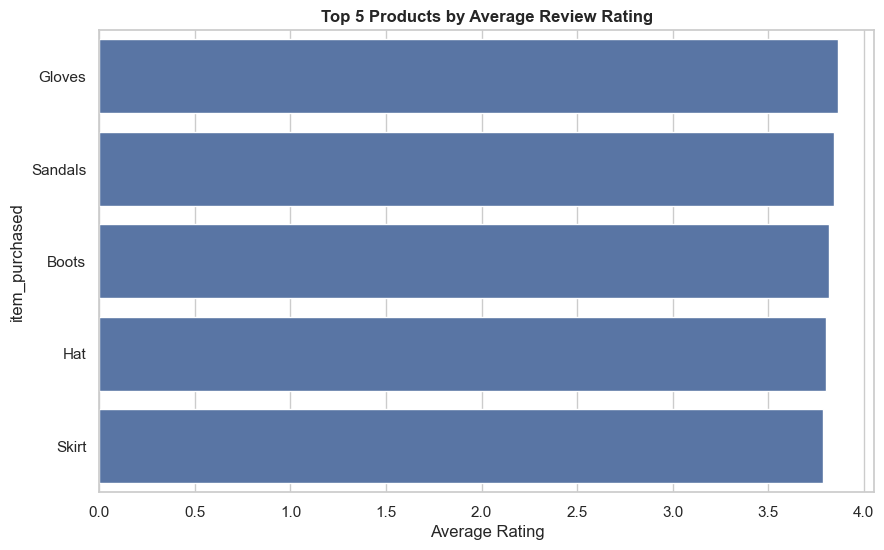

In [7]:
# Q3: Top 5 products with highest average review rating
if 'item_purchased' in df.columns and 'review_rating' in df.columns:
    top5_rated = df.groupby('item_purchased')['review_rating'].mean().dropna().sort_values(ascending=False).head(5)
    display(top5_rated)
    sns.barplot(x=top5_rated.values, y=top5_rated.index)
    plt.title('Top 5 Products by Average Review Rating')
    plt.xlabel('Average Rating')
    plt.show()

shipping_type
2-Day Shipping    60.733652
Express           60.475232
Free Shipping     60.410370
Store Pickup      59.893846
Next Day Air      58.631173
Standard          58.460245
Name: purchase_amount_usd, dtype: float64

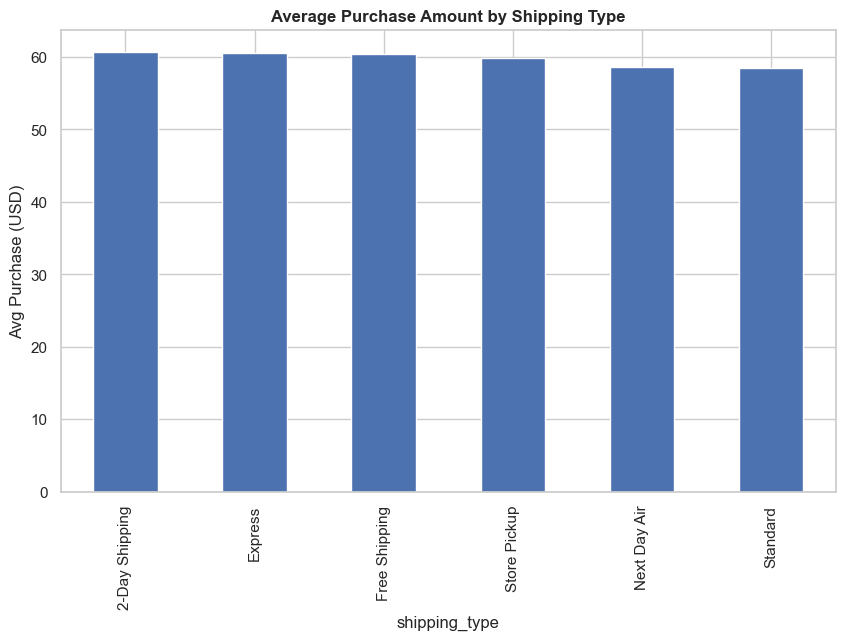

In [8]:
# Q4: Average purchase amount between Standard and Express Shipping
if 'shipping_type' in df.columns:
    ship_mean = df.groupby('shipping_type')['purchase_amount_usd'].mean().sort_values(ascending=False)
    display(ship_mean)
    ship_mean.plot(kind='bar', title='Average Purchase Amount by Shipping Type', ylabel='Avg Purchase (USD)')
    plt.show()

In [9]:
# Q5: Subscribed vs Non-Subscribed - mean and total revenue
if 'subscribed' in df.columns:
    sub_stats = df.groupby('subscribed')['purchase_amount_usd'].agg(['mean','sum','count']).rename(index={True:'subscribed', False:'not_subscribed'})
    display(sub_stats)

In [10]:
# Q6: Top 5 products with highest percentage of purchases with discounts applied
if 'discount_applied' in df.columns and 'item_purchased' in df.columns:
    total_by_product = df.groupby('item_purchased').size()
    disc_by_product = df[df['discount_applied']].groupby('item_purchased').size()
    perc = (disc_by_product / total_by_product).dropna().sort_values(ascending=False).head(5) * 100
    display(perc)

item_purchased
Hat         50.000000
Sneakers    49.655172
Coat        49.068323
Sweater     48.170732
Pants       47.368421
dtype: float64

segment
Loyal        89.128205
Returning     8.743590
New           2.128205
Name: proportion, dtype: float64

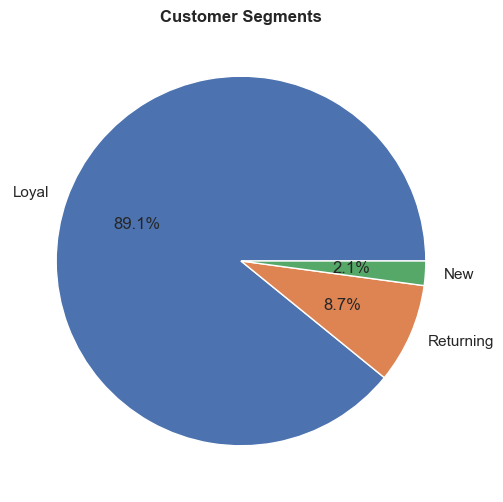

In [11]:
# Q7: Segment customers into New (1), Returning (2-5), Loyal (>5) based on previous purchases
if 'previous_purchases' in df.columns:
    cust_counts = df.groupby('customer_id')['previous_purchases'].max().reset_index()
    def seg(n):
        if n <= 1: return 'New'
        if n <= 5: return 'Returning'
        return 'Loyal'
    cust_counts['segment'] = cust_counts['previous_purchases'].apply(seg)
    seg_counts = cust_counts['segment'].value_counts(normalize=True) * 100
    display(seg_counts)
    seg_counts.plot(kind='pie', autopct='%1.1f%%', title='Customer Segments')
    plt.ylabel('')
    plt.show()

In [12]:
# Q8: Top 3 most purchased products within each category
if 'category' in df.columns and 'item_purchased' in df.columns:
    top3_each = df.groupby(['category','item_purchased']).size().reset_index(name='count').sort_values(['category','count'], ascending=[True,False]).groupby('category').head(3)
    display(top3_each)

,category,item_purchased,count
5,Accessories,Jewelry,171
1,Accessories,Belt,161
7,Accessories,Sunglasses,161
8,Clothing,Blouse,171
12,Clothing,Pants,171
13,Clothing,Shirt,169
20,Footwear,Sandals,160
21,Footwear,Shoes,150
22,Footwear,Sneakers,145
24,Outerwear,Jacket,163


In [13]:
# Q9: Are repeat buyers (>5 purchases) also likely to subscribe?
if 'customer_id' in df.columns and 'subscribed' in df.columns and 'previous_purchases' in df.columns:
    repeat = df.groupby('customer_id')['previous_purchases'].max().reset_index()
    repeat['is_repeat'] = repeat['previous_purchases'] > 5
    merged = repeat.merge(df[['customer_id','subscribed']].drop_duplicates(), on='customer_id', how='left')
    display(pd.crosstab(merged['is_repeat'], merged['subscribed'], normalize='index')*100)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18924\1160875805.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_by_age = df.groupby('age_group')['purchase_amount_usd'].sum().sort_values(ascending=False)


age_group
46-55    45619
56-65    44352
26-35    44342
36-45    43234
18-25    30491
65+      20904
<18       4139
Name: purchase_amount_usd, dtype: int64

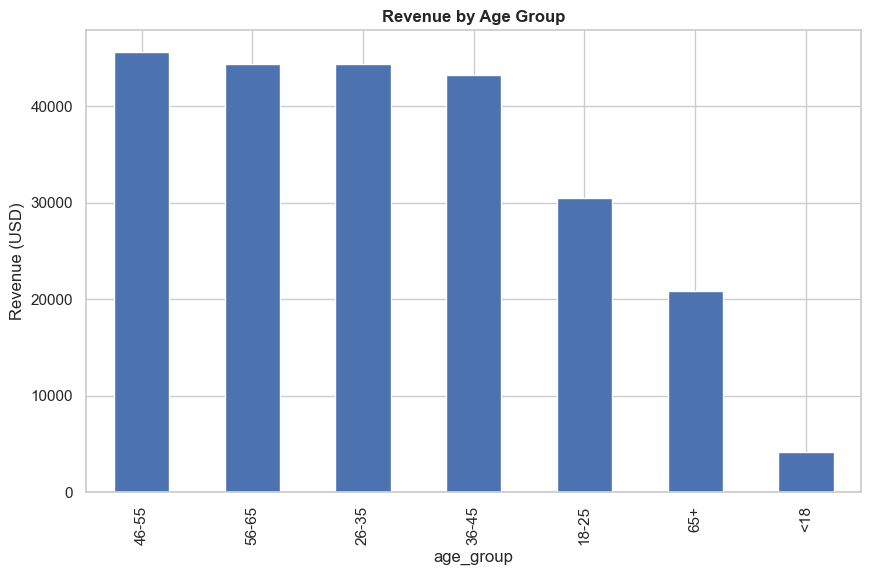

In [14]:
# Q10: Revenue contribution by age group
if 'age' in df.columns:
    bins = [0,18,25,35,45,55,65,200]
    labels = ['<18','18-25','26-35','36-45','46-55','56-65','65+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    rev_by_age = df.groupby('age_group')['purchase_amount_usd'].sum().sort_values(ascending=False)
    display(rev_by_age)
    rev_by_age.plot(kind='bar', title='Revenue by Age Group', ylabel='Revenue (USD)')
    plt.show()

,review_rating,purchase_amount_usd
review_rating,1.000000,0.029859
purchase_amount_usd,0.029859,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_18924\827489751.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cat_repeat = df.groupby('category').apply(lambda x: (x['previous_purchases']>1).mean()).sort_values(ascending=False)


category
Clothing       0.983880
Accessories    0.977419
Footwear       0.974958
Outerwear      0.962963
dtype: float64

discount_applied
False    18.431472
True     18.886840
Name: freq_per_year, dtype: float64

location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
Name: purchase_amount_usd, dtype: int64

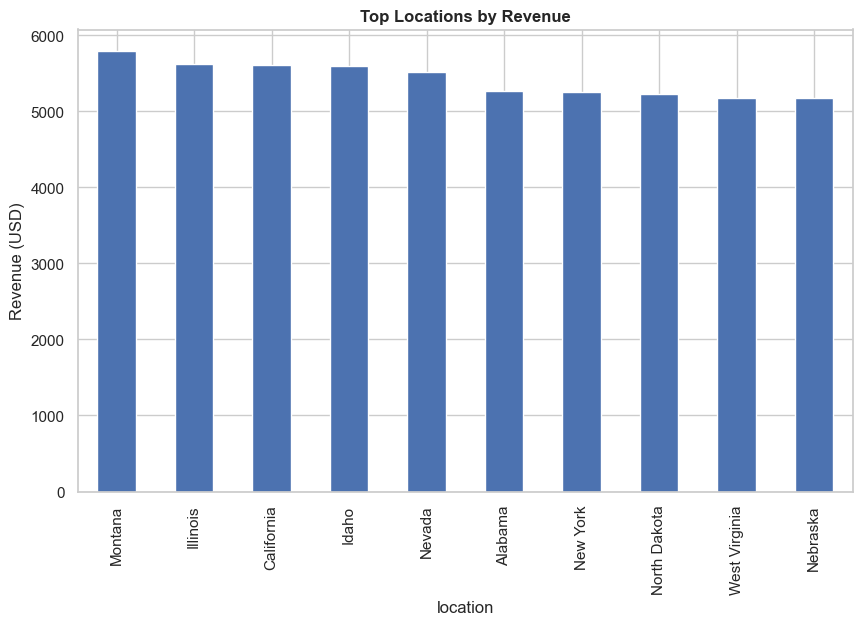

In [15]:
# Q11: Correlation between rating and purchase amount
if 'review_rating' in df.columns:
    display(df[['review_rating','purchase_amount_usd']].corr())

# Q12: Category repeat purchase rate (approx using previous_purchases)
if 'category' in df.columns and 'previous_purchases' in df.columns:
    cat_repeat = df.groupby('category').apply(lambda x: (x['previous_purchases']>1).mean()).sort_values(ascending=False)
    display(cat_repeat)

# Q13: Monthly sales trend
if 'purchase_date' in df.columns and not df['purchase_date'].isna().all():
    df['purchase_month'] = df['purchase_date'].dt.month
    monthly = df.groupby('purchase_month')['purchase_amount_usd'].sum()
    display(monthly)
    monthly.plot(title='Monthly Revenue Trend', xlabel='Month', ylabel='Revenue (USD)')
    plt.show()

# Q14: Do discounts increase purchase frequency?
if 'discount_applied' in df.columns and 'frequency_of_purchases' in df.columns:
    freq_map = {'weekly':52,'fortnightly':26,'monthly':12,'quarterly':4,'annually':1,'biweekly':26}
    df['freq_per_year'] = df['frequency_of_purchases'].astype(str).str.lower().map(freq_map)
    disc_freq = df.groupby('discount_applied')['freq_per_year'].mean()
    display(disc_freq)

# Q15: Top regions/cities by revenue
if 'location' in df.columns:
    top_locations = df.groupby('location')['purchase_amount_usd'].sum().sort_values(ascending=False).head(10)
    display(top_locations)
    top_locations.plot(kind='bar', title='Top Locations by Revenue', ylabel='Revenue (USD)')
    plt.show()